<a href="https://colab.research.google.com/github/arjunpv02/Games-python-/blob/main/supermarket_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
rd = pd.read_csv("/your_dataset4.csv")
#print(rd.head())
print(rd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Review ID                            1500 non-null   object 
 1   Timestamp                            1500 non-null   object 
 2   Location                             1500 non-null   object 
 3   Product ID                           1500 non-null   object 
 4   Product Name                         1500 non-null   object 
 5   Review Text                          1500 non-null   object 
 6   Rating                               1500 non-null   float64
 7   Sentiment Label                      1500 non-null   object 
 8   Aspect/Attribute                     1500 non-null   object 
 9   Aspect Sentiment                     1500 non-null   float64
 10  Customer Demographics                1500 non-null   object 
 11  Feedback Type                 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [17]:
import os

file_path = "/content/your_dataset4.csv"
if not os.path.isfile(file_path):
    print("File not found:", file_path)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#print(rd.info())

# Select relevant features
features = rd[['Review ID', 'Product ID', 'Product Name', 'Rating', 'Aspect Sentiment', 'Response', 'Time Spent',
               'Repeatedly Spoken Product', 'Less Checked Item','Purchase Intent',
               'Competition Analysis', 'Recommendations', 'Overall Satisfaction', 'Timespend Looking Ads',
               'Extra Timespend Competitors', 'Item Pickup Competitors', 'Sales Data (2 months)',
               'Brand Rep (2 months)','Foot Traffic Density (in that area)',
               'Packaging Rating']]

# Display the selected features
print(features.head())

#Normalize the selected attributes
scaler = MinMaxScaler()
normalised_features = scaler.fit_transform(features.drop(columns=['Review ID', 'Product ID', 'Product Name']))

#Assign weights to normalised attributes..
# Define the features and their corresponding weights based on priorities
weights = {
    'Rating': 0.1,
    'Aspect Sentiment': 0.1,
    'Response': 0.1,
    'Time Spent': 0.1,
    'Repeatedly Spoken Product': 0.05,
    'Less Checked Item': 0.05,
    'Purchase Intent': 0.05,
    'Competition Analysis': 0.05,
    'Recommendations': 0.05,
    'Overall Satisfaction': 0.05,
    'Timespend Looking Ads': 0.05,
    'Extra Timespend Competitors': 0.05,
    'Item Pickup Competitors': 0.05,
    'Sales Data (2 months)': 0.05,
    'Brand Rep (2 months)': 0.05,
    'Foot Traffic Density (in that area)': 0.05,
    'Packaging Rating': 0.05
}

# Calculate the total weight
total_weight = sum(weights.values())

# Normalize the weights so that their sum is equal to 1
normalized_weights = {feature: weight / total_weight for feature, weight in weights.items()}

# Print the normalized weights for each feature
for feature, weight in normalized_weights.items():
    print(f"{feature}: {weight}")


File not found: /content/your_dataset4.csv
                              Review ID Product ID Product Name  Rating  \
0  61fa5f8e-0205-4e13-91bc-5c742673cae2     F14E8E          him     6.4   
1  dc9f00e9-1a44-4762-a5a7-4e0f503508c8     7CD51D       detail     8.1   
2  94e732ce-b73f-43ee-82d1-47d10cc8539a     6DBD68      forward     0.5   
3  7c1f6a7e-1c25-4636-abac-d349ac295bee     0BDFE8     specific     5.6   
4  7e086857-4991-43e6-8f39-275c217a0f83     67BD24        glass     4.0   

   Aspect Sentiment  Response  Time Spent  Repeatedly Spoken Product  \
0               8.7       5.7         5.5                        8.7   
1               8.0       9.9         8.0                        7.3   
2               7.7       8.7         3.8                        4.5   
3               8.4       8.2         8.1                        4.0   
4              10.0       4.9         7.6                        8.6   

   Less Checked Item  Purchase Intent  Competition Analysis  Recommendati

In [18]:

rd['item value'] = (normalised_features * np.array(list(normalized_weights.values()))).sum(axis=1)

print(rd['item value'])




0       0.645565
1       0.845281
2       0.531727
3       0.605065
4       0.596864
          ...   
1495    0.540265
1496    0.850298
1497    0.831520
1498    0.510346
1499    0.689639
Name: item value, Length: 1500, dtype: float64


In [19]:
# prompt: help me to print rd values in descending order

rd.sort_values(by=['item value'], inplace=True, ascending=False)
print(rd)


                                 Review ID         Timestamp         Location  \
874   17e543c0-026d-4381-82fa-663037ceeacb  22-11-2021 17:01  New Victoriaton   
803   ff70ac9b-788e-4919-8d2b-6c5b4be82fc0  10-04-2021 05:29         Port Ian   
59    dca2f18c-4a44-4fc3-82df-8f353adc290b  15-08-2023 09:01        Lindaland   
971   e0f86df1-50d1-45cc-9ec7-3eeabc90c6d9  23-01-2020 15:13       Nicoleberg   
924   8c884065-0bca-495b-9cc1-fbc9e25c486f  01-02-2021 01:11   South Louiston   
...                                    ...               ...              ...   
454   feaad8a1-848e-4b52-96a3-9ab43072baef  16-09-2022 01:39  Christopherstad   
393   79dc3cae-d0fc-4edb-ac78-f2462663c40f  23-09-2022 09:52    New Jamesbury   
1289  34b037cb-272b-464c-94cb-7803b50d3944  12-06-2021 11:58    West Johnside   
951   d583bfc6-9b85-4bfb-9524-baf5f6d492ee  24-11-2022 22:42         Joelbury   
1419  040e67b5-a6b5-4ff0-8242-445d787b62e5  21-11-2020 04:24        Kevinberg   

     Product ID Product Nam

In [20]:
# prompt: from the above code help me to sort the item values

sorted_products = rd.sort_values(by=['item value'], ascending=False, inplace=True)
print(sorted_products)

from sklearn.model_selection import train_test_split

# Define features and target variable
X = features.drop(columns=['Review ID', 'Product ID', 'Product Name'])  # Features
y = rd['item value']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

None
X_train shape: (1200, 17)
y_train shape: (1200,)
X_test shape: (300, 17)
y_test shape: (300,)


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Perform cross-validation (5-fold cross-validation)
scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the scores to positive values and calculate the mean score
rmse_scores = np.sqrt(-scores)
mean_rmse = np.mean(rmse_scores)

print("Mean RMSE (cross-validation):", mean_rmse)


Mean RMSE (cross-validation): 0.15955880042265763


In [22]:
# prompt: as like the above i need to test kn n efficiency too , so give me code

from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNeighborsRegressor
kn_regressor = KNeighborsRegressor(n_neighbors=9)

# Perform cross-validation (5-fold cross-validation)
scores = cross_val_score(kn_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the scores to positive values and calculate the mean score
rmse_scores = np.sqrt(-scores)
mean_rmse = np.mean(rmse_scores)

print("Mean RMSE (KNeighborsRegressor, k=9):", mean_rmse)

# You can repeat the above steps with different values of k to find the optimal k value for your dataset.


Mean RMSE (KNeighborsRegressor, k=9): 0.16525805266375293


In [23]:
# prompt: also do this for 3 more different algorithams, i need to check diiferent algorithms for best fit

# 1. Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(random_state=42)

# Perform cross-validation (5-fold cross-validation)
scores = cross_val_score(gb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the scores to positive values and calculate the mean score
rmse_scores = np.sqrt(-scores)
mean_rmse = np.mean(rmse_scores)

print("Mean RMSE (Gradient Boosting Regressor):", mean_rmse)

# 2. Support Vector Regressor
from sklearn.svm import SVR

svr_regressor = SVR(kernel='rbf')

# Perform cross-validation (5-fold cross-validation)
scores = cross_val_score(svr_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the scores to positive values and calculate the mean score
rmse_scores = np.sqrt(-scores)
mean_rmse = np.mean(rmse_scores)

print("Mean RMSE (Support Vector Regressor):", mean_rmse)

# 3. XGBoost Regressor
from xgboost import XGBRegressor

xgb_regressor = XGBRegressor(random_state=42)

# Perform cross-validation (5-fold cross-validation)
scores = cross_val_score(xgb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the scores to positive values and calculate the mean score
rmse_scores = np.sqrt(-scores)
mean_rmse = np.mean(rmse_scores)

print("Mean RMSE (XGBoost Regressor):", mean_rmse)


Mean RMSE (Gradient Boosting Regressor): 0.1612078733943744
Mean RMSE (Support Vector Regressor): 0.17166926458926662
Mean RMSE (XGBoost Regressor): 0.17424762504532654


In [24]:
# prompt: also check different algorithams too please

# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error  # Import the required module

# Initialize different regressors
rf_regressor = RandomForestRegressor(random_state=42)
svr_regressor = SVR(kernel='rbf')
gb_regressor = GradientBoostingRegressor(random_state=42)
xgb_regressor = XGBRegressor(random_state=42)

# Define features and target variable
X = features.drop(columns=['Review ID', 'Product ID', 'Product Name'])  # Features
y = rd['item value']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate each regressor
models = [
    ('Random Forest', rf_regressor),
    ('Support Vector Regression', svr_regressor),
    ('Gradient Boosting', gb_regressor),
    ('XGBoost', xgb_regressor)
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'{name} RMSE: {rmse}')

Random Forest RMSE: 0.15827952650752866
Support Vector Regression RMSE: 0.16904514916690094
Gradient Boosting RMSE: 0.15884059115319094
XGBoost RMSE: 0.16697484531735232


In [25]:
# prompt: also check liner regression too

from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_regression = LinearRegression()

# Train the model
linear_regression.fit(X_train, y_train)

# Evaluate the model
y_pred_linear = linear_regression.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

# Print the results
print(f'Linear Regression RMSE: {rmse_linear}')


Linear Regression RMSE: 0.1567179584324483


In [27]:
# prompt: i fixed linear regression model , so categorise these different product using if and elif,,, and find the top top products having high 'item value'

# Categorize products based on 'item value'
def categorize_product(item_value):
    if item_value >= 0.85:
        return "Excellent"
    elif item_value >= 0.74:
        return "Good"
    elif item_value >= 0.55:
        return "Average"
    elif item_value >= 0.2:
        return "Poor"
    else:
        return "Needs Improvement"

# Create a new column with categorized product values
rd['Product Category'] = rd['item value'].apply(categorize_product)

# Find the top N products with the highest 'item value'
top_n = 50
top_products = rd.nlargest(top_n, 'item value')

# Print the top products
print(top_products[['Product Name', 'item value', 'Product Category']])



     Product Name  item value Product Category
874    commercial    0.898754        Excellent
803     education    0.890702        Excellent
59       behavior    0.878153        Excellent
971      question    0.875354        Excellent
924     important    0.873930        Excellent
326      position    0.871626        Excellent
1422     director    0.871592        Excellent
895         throw    0.870159        Excellent
1160        money    0.869577        Excellent
370          what    0.866210        Excellent
1243  interesting    0.865604        Excellent
1241   Republican    0.864627        Excellent
745          skin    0.864334        Excellent
52           hard    0.863189        Excellent
1187        trade    0.863179        Excellent
1161       father    0.861563        Excellent
696        notice    0.861275        Excellent
473          side    0.861183        Excellent
1130         ball    0.859538        Excellent
941          fish    0.859317        Excellent
795       pro

In [28]:
# prompt: print all the products with necessary features having product category excellent and good in descending 'item  value'

excellent_good_products = rd[rd['Product Category'].isin(['Excellent', 'Good'])]
sorted_excellent_good_products = excellent_good_products.sort_values(by=['item value'], ascending=False)

print(sorted_excellent_good_products[['Product Name', 'Rating', 'Aspect Sentiment', 'Response', 'Time Spent',
               'Repeatedly Spoken Product', 'Less Checked Item','Purchase Intent',
               'Competition Analysis', 'Recommendations', 'Overall Satisfaction', 'Timespend Looking Ads',
               'Extra Timespend Competitors', 'Item Pickup Competitors', 'Sales Data (2 months)',
               'Brand Rep (2 months)','Foot Traffic Density (in that area)',
               'Packaging Rating', 'item value', 'Product Category']])


     Product Name  Rating  Aspect Sentiment  Response  Time Spent  \
874    commercial     9.9               9.6       9.7         9.0   
803     education     8.7               8.3       9.6         9.9   
59       behavior     9.8               8.8       8.4         8.7   
971      question     9.2               8.4       9.0         8.2   
924     important     9.1               9.8       8.5         8.8   
...           ...     ...               ...       ...         ...   
774        summer     6.9              10.0       9.6         9.4   
1356    condition     6.7               5.9       9.6         5.1   
177    throughout     7.7               8.1       8.1         6.1   
655          well     7.6               8.8       8.9         8.6   
240     religious     8.0               9.8       6.7         6.9   

      Repeatedly Spoken Product  Less Checked Item  Purchase Intent  \
874                         9.6                7.6              8.2   
803                         8

In [29]:
# prompt: dont need this much features to print , update code in such a way that only print essentail 5 features only

excellent_good_products = rd[rd['Product Category'].isin(['Excellent', 'Good'])]
sorted_excellent_good_products = excellent_good_products.sort_values(by=['item value'], ascending=False)

print(sorted_excellent_good_products[['Product Name', 'Rating', 'Aspect Sentiment', 'Response', 'item value', 'Product Category']])


     Product Name  Rating  Aspect Sentiment  Response  item value  \
874    commercial     9.9               9.6       9.7    0.898754   
803     education     8.7               8.3       9.6    0.890702   
59       behavior     9.8               8.8       8.4    0.878153   
971      question     9.2               8.4       9.0    0.875354   
924     important     9.1               9.8       8.5    0.873930   
...           ...     ...               ...       ...         ...   
774        summer     6.9              10.0       9.6    0.741178   
1356    condition     6.7               5.9       9.6    0.740491   
177    throughout     7.7               8.1       8.1    0.740293   
655          well     7.6               8.8       8.9    0.740212   
240     religious     8.0               9.8       6.7    0.740212   

     Product Category  
874         Excellent  
803         Excellent  
59          Excellent  
971         Excellent  
924         Excellent  
...               ...  
774

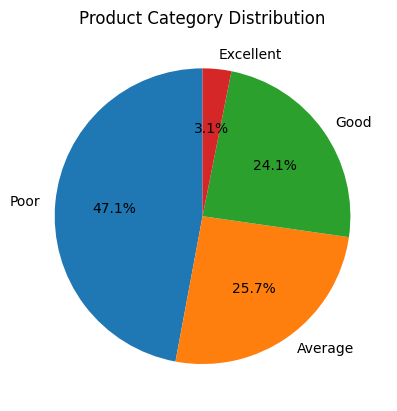

In [30]:
# prompt: create a piechart of product category

import matplotlib.pyplot as plt

# Extract data for the pie chart
product_category_counts = (
    rd['Product Category'].value_counts()
    .sort_values(ascending=False)
    .head(5)
)
labels = product_category_counts.index.to_list()
sizes = product_category_counts.values.tolist()

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.set_title('Product Category Distribution')
plt.show()


In [33]:
# prompt: in the similar fashion i need to print all the products having poor product category , print it as like above..

poor_products = rd[rd['Product Category'] == 'Poor']
sorted_poor_products = poor_products.sort_values(by=['item value'], ascending=False)

print(sorted_poor_products[['Product Name', 'Rating', 'Aspect Sentiment', 'Response', 'item value', 'Product Category']])


     Product Name  Rating  Aspect Sentiment  Response  item value  \
196       evening     3.8               7.7       6.8    0.549057   
457           eat     0.9               8.0       4.9    0.548980   
1490         list     4.6               4.4       3.4    0.548413   
487            by     5.2               2.7       9.1    0.548114   
408           any     2.9               9.1       1.8    0.548100   
...           ...     ...               ...       ...         ...   
454       herself     2.9               1.8       6.1    0.304545   
393          when     1.2               0.1       1.2    0.304286   
1289        stock     2.2               3.1       2.0    0.298913   
951         least     0.6               1.6       1.1    0.298773   
1419  interesting     3.9               5.7       0.5    0.278610   

     Product Category  
196              Poor  
457              Poor  
1490             Poor  
487              Poor  
408              Poor  
...               ...  
454

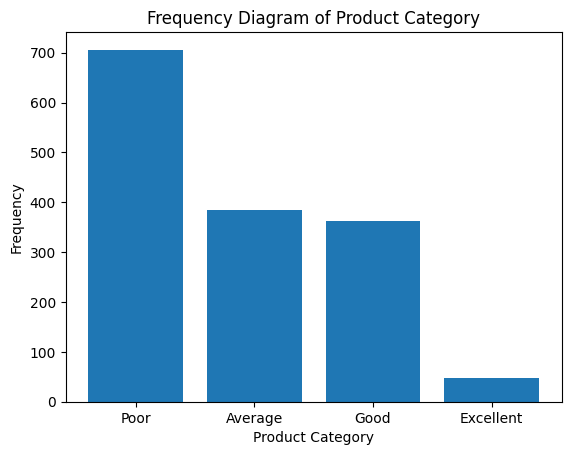

In [32]:
# prompt: give me a frequency diagram  of product category

import matplotlib.pyplot as plt

# Extract data for the frequency diagram
product_category_counts = rd['Product Category'].value_counts()

# Create the frequency diagram
plt.figure(figsize=(12, 6))
product_category_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.title('Product Category Frequency Diagram')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the diagram
plt.show()


In [34]:
# prompt: give the top rated products graphs using other visualization tool rather than  matplot lib

import plotly.express as px

# Prepare data for the pie chart
product_category_counts = (
    rd['Product Category'].value_counts()
    .sort_values(ascending=False)
    .head(5)
)
labels = product_category_counts.index.to_list()
sizes = product_category_counts.values.tolist()

# Create the pie chart
fig = px.pie(values=sizes, names=labels, title='Product Category Distribution')
fig.show()

# Prepare data for the frequency diagram
product_category_counts = rd['Product Category'].value_counts()

# Create the frequency diagram
fig = px.bar(product_category_counts, x=product_category_counts.index, y=product_category_counts.values,
             title='Product Category Frequency Diagram')
fig.update_xaxes(tickangle=45)
fig.show()

# Prepare data for the scatter plot
top_rated_products = rd.nlargest(10, 'Rating')

# Create the scatter plot
fig = px.scatter(top_rated_products, x='Product Name', y='Rating',
                 title='Top Rated Products', color='Product Category')
fig.update_layout(xaxis_tickangle=45)
fig.show()


In [35]:
# prompt: get all the top rated products name

top_rated_products = rd.sort_values(by='Rating', ascending=False)
top_rated_product_names = top_rated_products['Product Name'].tolist()
print(top_rated_product_names)


['continue', 'teacher', 'need', 'dream', 'by', 'them', 'maintain', 'might', 'direction', 'open', 'theory', 'responsibility', 'hour', 'I', 'hear', 'involve', 'feeling', 'you', 'likely', 'up', 'similar', 'those', 'bill', 'commercial', 'money', 'benefit', 'notice', 'go', 'unit', 'statement', 'wear', 'spring', 'what', 'police', 'decision', 'follow', 'book', 'father', 'add', 'job', 'mother', 'list', 'society', 'source', 'majority', 'behavior', 'stand', 'stand', 'listen', 'worry', 'all', 'point', 'meet', 'that', 'nature', 'skin', 'cut', 'lot', 'hot', 'white', 'watch', 'goal', 'animal', 'people', 'whom', 'hair', 'degree', 'different', 'hot', 'hard', 'appear', 'indicate', 'budget', 'move', 'continue', 'onto', 'couple', 'position', 'anyone', 'degree', 'line', 'big', 'interesting', 'next', 'hard', 'recent', 'personal', 'themselves', 'catch', 'challenge', 'enjoy', 'him', 'space', 'station', 'list', 'family', 'mind', 'upon', 'audience', 'bill', 'bar', 'rest', 'data', 'mother', 'task', 'newspaper',

In [39]:
# prompt: give me a complex  diagram of top products

import plotly.graph_objects as go

# Define data
top_products = rd.nlargest(10, 'item value')
product_names = top_products['Product Name'].tolist()
item_values = top_products['item value'].tolist()

# Create the figure
fig = go.Figure(data=[go.Bar(x=product_names, y=item_values, marker_color='lightsalmon')])

# Update layout
fig.update_layout(title='Top Products by Item Value', xaxis_tickangle=45)

# Create a complex diagram
fig.update_layout(
    title='Top Products by Item Value',
    xaxis_tickangle=-45,
    yaxis=dict(
        title='Item Value',
        tickfont=dict(size=14),
        showgrid=True,
        gridwidth=0.5,
        gridcolor='gray'
    ),
    yaxis_showgrid=True,
    yaxis_gridwidth=0.5,
    yaxis_gridcolor='gray',
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False
)

# Add annotations
for i, value in enumerate(item_values):
    fig.add_annotation(x=i, y=value + 0.05, text=str(value), showarrow=False)

# Display the figure
fig.show()


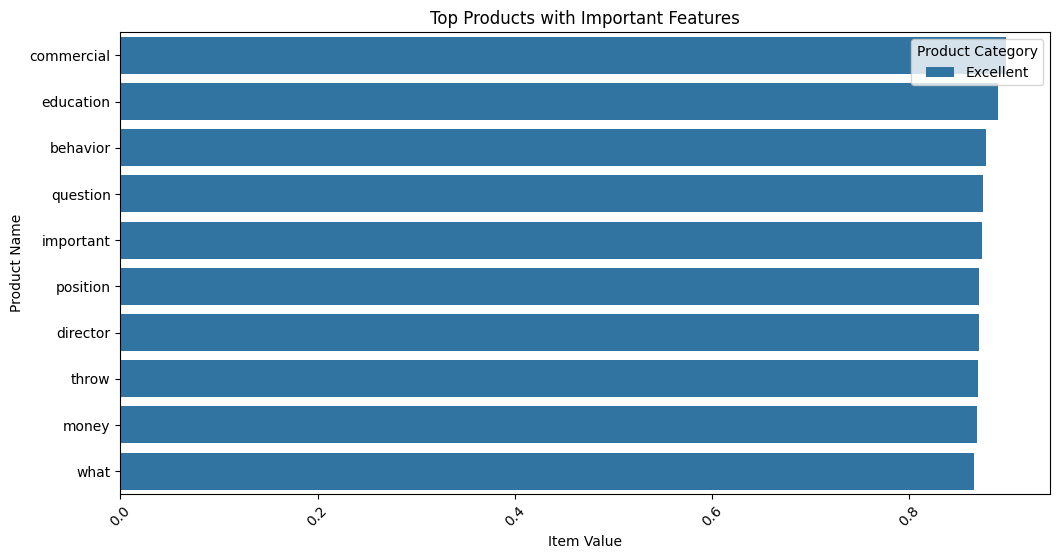

In [38]:
# prompt: get all the top rated products name and important features and represent  it visyually
import seaborn as sns
# Get the top N products with the highest 'item value'
top_n = 10
top_products = rd.nlargest(top_n, 'item value')

# Select important features
important_features = ['Product Name', 'Rating', 'Aspect Sentiment', 'Response', 'item value', 'Product Category']

# Filter the top products to include only the important features
top_products_filtered = top_products[important_features]

# Create a bar chart to visualize the top products and their important features
plt.figure(figsize=(12, 6))
sns.barplot(x='item value', y='Product Name', hue='Product Category', data=top_products_filtered)

# Add labels and title
plt.xlabel('Item Value')
plt.ylabel('Product Name')
plt.title('Top Products with Important Features')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the diagram
plt.show()
